# Support Vector Machines

### Linear SVM Classification

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
%matplotlib inline

raw_data = loadmat('ex6data1.mat')  

# Feature and output matrices
X = raw_data['X']
y = raw_data['y']

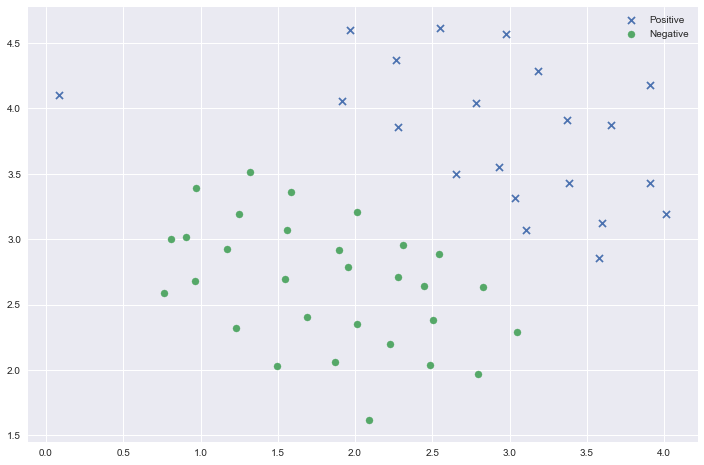

In [2]:
# Seperate training data set into positive and negative examples
positive = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
negative = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

fig, ax = plt.subplots(figsize=(12,8)) 
ax.scatter(positive[:, 0], positive[:, 1], s=50, marker='x', label='Positive')  
ax.scatter(negative[:, 0], negative[:, 1], s=50, marker='o', label='Negative')  
ax.legend()
ax.grid(True)

### C Parameter (SVM)
- The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example
- Larger value of C means a low bias and high variance fit
- For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

In [3]:
from sklearn import svm 

svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000) 

svc.fit(X, y.flatten())  
svc.score(X, y.ravel())  

0.98039215686274506

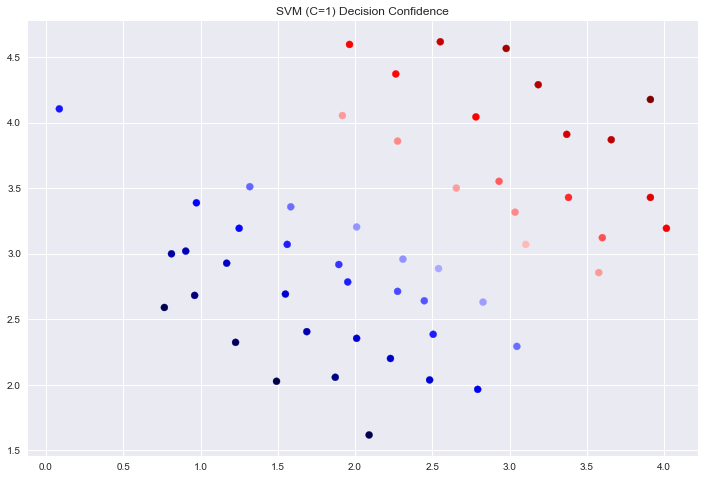

In [4]:
SVM_x = svc.decision_function(X)

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:, 0], X[:,1], s=50, c=SVM_x, cmap='seismic')  
ax.set_title('SVM (C=1) Decision Confidence')  

### Gaussian Kernel

- SVMs can also handle non-linear classification using something called the kernel trick to project the data into a high-dimensional space before attempting to find a hyperplane.

In [5]:
raw_data = loadmat('ex6data2.mat')
X = raw_data['X']
y = raw_data['y']

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

### Example of a data set that can't be seperated by a non-linear boundary

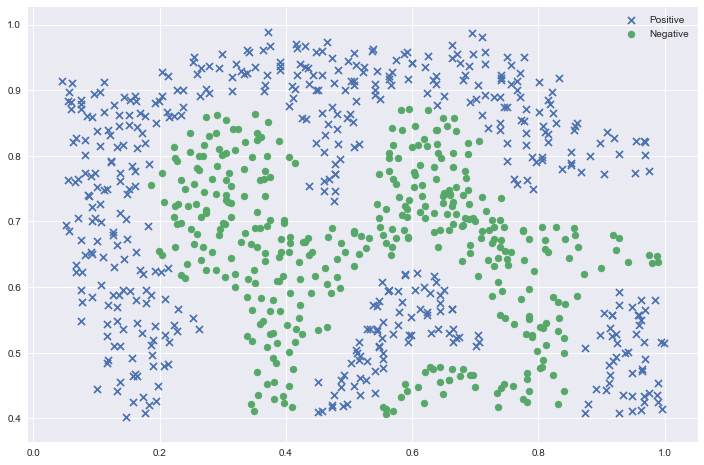

In [6]:
fig, ax = plt.subplots(figsize=(12,8)) 
ax.scatter(pos[:, 0], pos[:, 1], s=50, marker='x', label='Positive')  
ax.scatter(neg[:, 0], neg[:, 1], s=50, marker='o', label='Negative')  
ax.legend()
ax.grid(True)

In [7]:
def fit_svm(X, y, C=1):
    sigma = 0.1
    gamma = np.power(sigma,-2.)
    gaus_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma)
    gaus_svm.fit(X, y.flatten())
    gaus_svm.score(X, y.ravel())  
    return gaus_svm

#### NOTE
- Points with a solid red or blue color indicate that they're a solid distance from the hyperplane. This is not the case in the second image, where a 
- Number of points that are nearly white, indicate that they are directly adjacent to the hyperplane.
- C is a parameter that controls the penalty for misclassified examples
- A large C tell SVM to classify all examples correctly (may result in overfitting the data set)

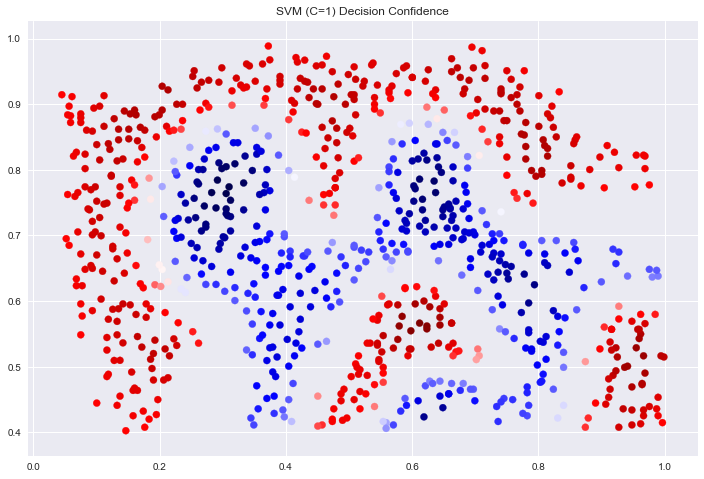

In [8]:
gaus_svm = fit_svm(X, y, C=1)
SVM_x = gaus_svm.decision_function(X)

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:, 0], X[:,1], s=50, c=SVM_x, cmap='seismic')  
ax.set_title('SVM (C=1) Decision Confidence')  

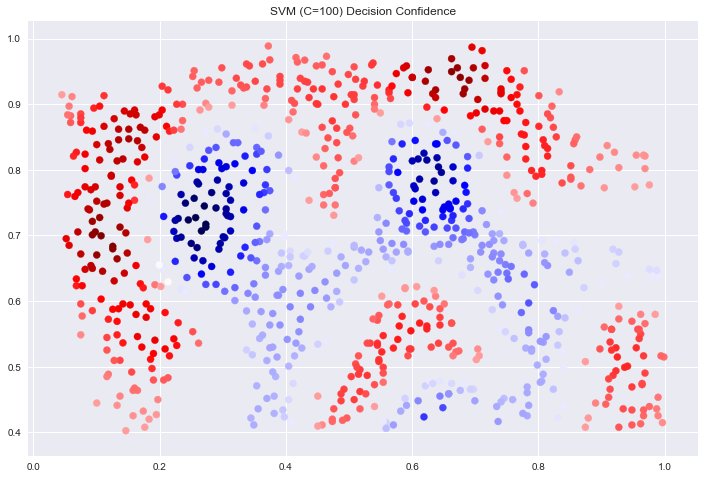

In [10]:
gaus_svm = fit_svm(X, y, C=100)
SVM_x = gaus_svm.decision_function(X)

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X[:, 0], X[:,1], s=50, c=SVM_x, cmap='seismic')  
ax.set_title('SVM (C=100) Decision Confidence') 

### Gamma Parameter (Gaussian Kernel)
- Gamma is the parameter of a Gaussian Kernel (to handle non-linear classification). 
- Small gamma will give you low bias and high variance while a large gamma will give you higher bias and low variance.

## Finding Optimum C and Gamma (Grid Search)
- We find the optimum values for C and Gamma using `Grid Search`


In [22]:
raw_data = loadmat('ex6data3.mat')

# Training dataset
X = raw_data['X']
y = raw_data['y']

train_pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
train_neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

# Validation dataset
X_val = raw_data['Xval']
y_val = raw_data['yval']

valid_pos = np.array([X_val[i] for i in range(X_val.shape[0]) if y_val[i] == 1])
valid_neg = np.array([X_val[i] for i in range(X_val.shape[0]) if y_val[i] == 0])

In [40]:
gamma_val = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
C_val = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
opt = {'C': 0, 'gamma': 0}

# Grid search to find the optimum values for C and gamma
for g in gamma_val:
    for c in C_val:
        svc = svm.SVC(C=c, gamma=g)
        svc.fit(X, y.flatten())
        score = svc.score(X_val, y_val.flatten())
        
        if score > best_score:
            best_score = score
            opt['C'] = c
            opt['gamma'] = g

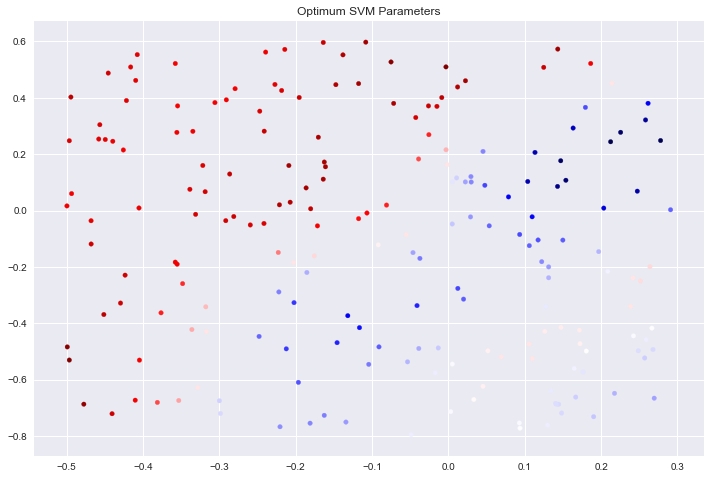

In [41]:
gaus_svm = svm.SVC(C=opt['C'], gamma=opt['gamma'])
gaus_svm.fit(X_val, y_val.flatten())
SVM_x = gaus_svm.decision_function(X_val)

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(X_val[:, 0], X_val[:,1], s=20, c=SVM_x, cmap='seismic')  
ax.set_title('Optimum SVM Parameters') 